In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
# CSV file paths
TELEGRAM_MESSAGES_CSV = "/home/ted/Desktop/DEV/marketing-analytics-dashboard/data/banks_ad_data.csv"
PLAY_STORE_REVIEWS_CSV = "/home/ted/Desktop/DEV/marketing-analytics-dashboard/data/abyssinia_bank_reviews.csv"

In [26]:
# Load data from CSV files
telegram_messages = pd.read_csv(TELEGRAM_MESSAGES_CSV)
play_store_reviews = pd.read_csv(PLAY_STORE_REVIEWS_CSV)

In [27]:
# Data Summarization
# Telegram messages dataset
print("Telegram Messages Dataset Summary:")
print(telegram_messages.describe())

# Google Play Store reviews dataset
print("\nGoogle Play Store Reviews Dataset Summary:")
print(play_store_reviews.describe())

Telegram Messages Dataset Summary:
                View  Post Hour  Time of day
count      21.000000        0.0          0.0
mean   188353.476190        NaN          NaN
std    125290.507108        NaN          NaN
min       238.000000        NaN          NaN
25%       301.000000        NaN          NaN
50%    238434.000000        NaN          NaN
75%    284381.000000        NaN          NaN
max    326763.000000        NaN          NaN

Google Play Store Reviews Dataset Summary:
                👍  replyContent  repliedAt       score
count  199.000000           0.0        0.0  199.000000
mean     2.899497           NaN        NaN    2.502513
std     21.047804           NaN        NaN    1.749096
min      0.000000           NaN        NaN    1.000000
25%      0.000000           NaN        NaN    1.000000
50%      0.000000           NaN        NaN    1.000000
75%      1.000000           NaN        NaN    5.000000
max    271.000000           NaN        NaN    5.000000


In [28]:
# Data Quality Assessment
print("\nMissing Values in Telegram Messages Dataset:")
print(telegram_messages.isnull().sum())

print("\nMissing Values in Google Play Store Reviews Dataset:")
print(play_store_reviews.isnull().sum())


Missing Values in Telegram Messages Dataset:
Date            0
Post link       0
View            0
Post Hour      21
Bank            0
Time of day    21
dtype: int64

Missing Values in Google Play Store Reviews Dataset:
reviewId                  0
userName                  0
userImage                 0
👍                         0
reviewCreatedVersion     50
at                        0
replyContent            199
repliedAt               199
appVersion               50
score                     0
Comments                  0
Sentiment                 0
Keywords                  3
LDA_Category              0
Insight                   0
dtype: int64


In [29]:
# Print column names of the Google Play Store reviews dataset
print("Column names of Google Play Store Reviews Dataset:")
print(play_store_reviews.columns)


Column names of Google Play Store Reviews Dataset:
Index(['reviewId', 'userName', 'userImage', '👍', 'reviewCreatedVersion', 'at',
       'replyContent', 'repliedAt', 'appVersion', 'score', 'Comments',
       'Sentiment', 'Keywords', 'LDA_Category', 'Insight'],
      dtype='object')


In [30]:
# Check the data type of the 'Sentiment' column
print(play_store_reviews['Sentiment'].dtype)


object


In [31]:
print(play_store_reviews['Sentiment'].unique())


['Neutral' 'Negative' 'Positive']


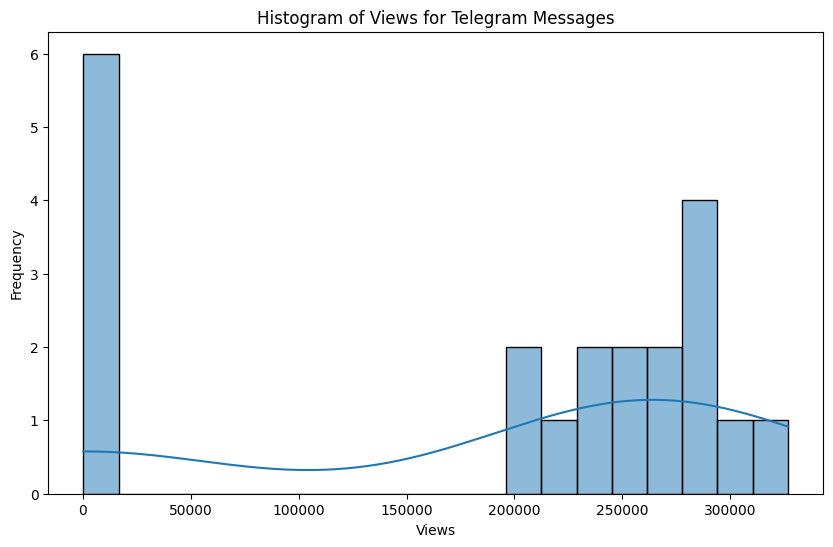

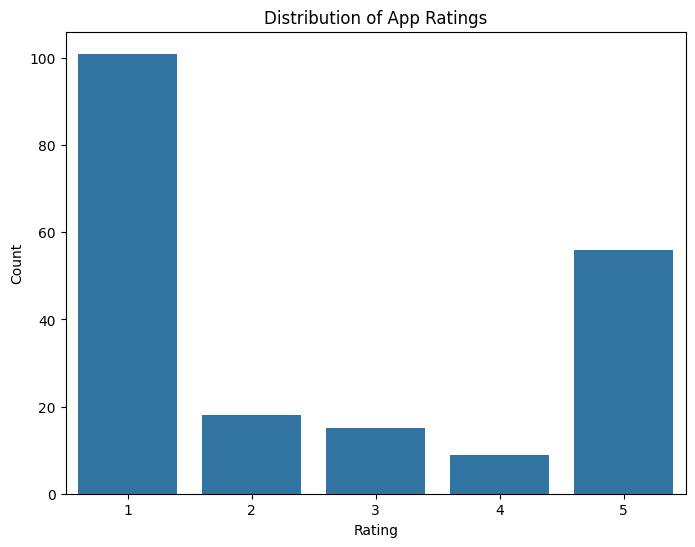

In [32]:
# Univariate Analysis
# Histogram of views for Telegram messages
plt.figure(figsize=(10, 6))
sns.histplot(telegram_messages['View'], bins=20, kde=True)
plt.title('Histogram of Views for Telegram Messages')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

# Bar plot of app ratings for Google Play Store reviews
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=play_store_reviews)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


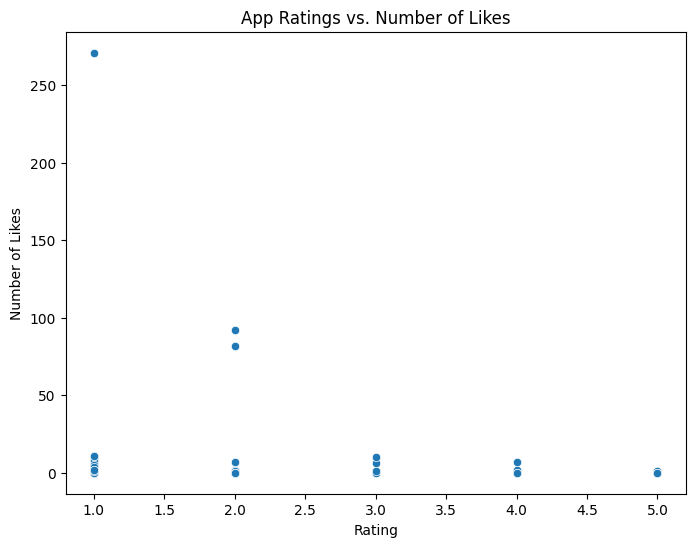

In [33]:
# Bivariate Analysis
# Scatter plot of app ratings vs. number of likes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='score', y='👍', data=play_store_reviews)
plt.title('App Ratings vs. Number of Likes')
plt.xlabel('Rating')
plt.ylabel('Number of Likes')
plt.show()




/home/ted/Desktop/DEV/marketing-analytics-dashboard/venv/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/ted/Desktop/DEV/marketing-analytics-dashboard/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


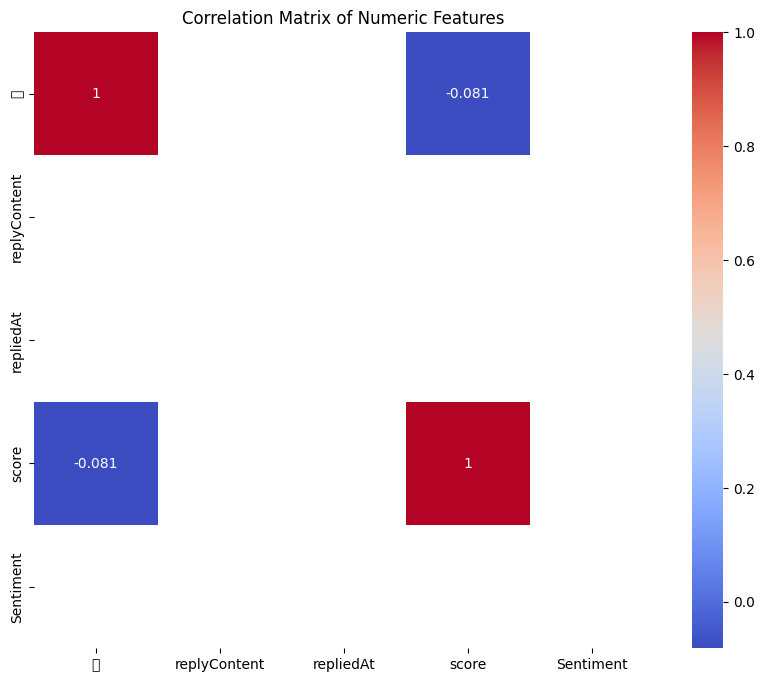

In [40]:
# Selecting only numeric columns
numeric_columns = play_store_reviews.select_dtypes(include=[np.number])

# Correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [43]:
from textblob import TextBlob

# Define a function to perform sentiment analysis
def perform_sentiment_analysis(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Add a new column 'Sentiment' to the Google Play Store reviews dataset based on sentiment analysis
play_store_reviews['Sentiment'] = play_store_reviews['Comments'].apply(perform_sentiment_analysis)


In [45]:
# Add a new column 'Sentiment' to the Google Play Store reviews dataset based on sentiment analysis
# Data Enrichment:
play_store_reviews['Sentiment'] = play_store_reviews['Comments'].apply(perform_sentiment_analysis)


In [85]:
print(play_store_reviews['Sentiment'])

0       neutral
1       neutral
2      negative
3      positive
4      positive
         ...   
194    negative
195     neutral
196    positive
197    negative
198    positive
Name: Sentiment, Length: 199, dtype: object


In [50]:
print(telegram_messages.columns)


Index(['Date', 'Post link', 'View', 'Post Hour', 'Bank', 'Time of day'], dtype='object')


In [55]:
print(telegram_messages.head())
print(telegram_messages.columns)

              Date                               Post link    View  Post Hour  \
0  Apr 23 at 17:23  https://t.me/tikvahethiopia/4295054430  293217        NaN   
1  Apr 19 at 20:11  https://t.me/tikvahethiopia/4295054314  292276        NaN   
2  Apr 16 at 11:12  https://t.me/tikvahethiopia/4295054246  295272        NaN   
3   Apr 2 at 14:13  https://t.me/tikvahethiopia/4295053851  284381        NaN   
4  Mar 29 at 14:47  https://t.me/tikvahethiopia/4295053767  276917        NaN   

  Bank  Time of day  
0  BOA          NaN  
1  BOA          NaN  
2  BOA          NaN  
3  BOA          NaN  
4  BOA          NaN  
Index(['Date', 'Post link', 'View', 'Post Hour', 'Bank', 'Time of day'], dtype='object')


/tmp/ipykernel_66477/2392054061.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Bank', y='View', data=telegram_messages, estimator=sum, ci=None)


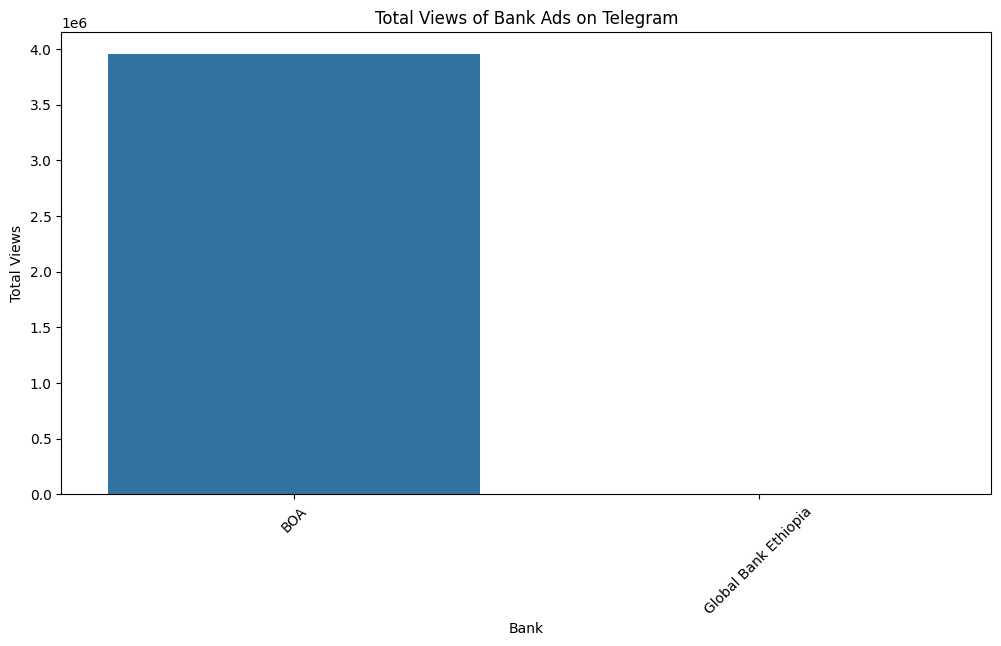

In [56]:
# Data Comparison:
# Data Comparison: Bar plot of total views for different banks
plt.figure(figsize=(12, 6))
sns.barplot(x='Bank', y='View', data=telegram_messages, estimator=sum, ci=None)
plt.title('Total Views of Bank Ads on Telegram')
plt.xlabel('Bank')
plt.ylabel('Total Views')
plt.xticks(rotation=45)
plt.show()

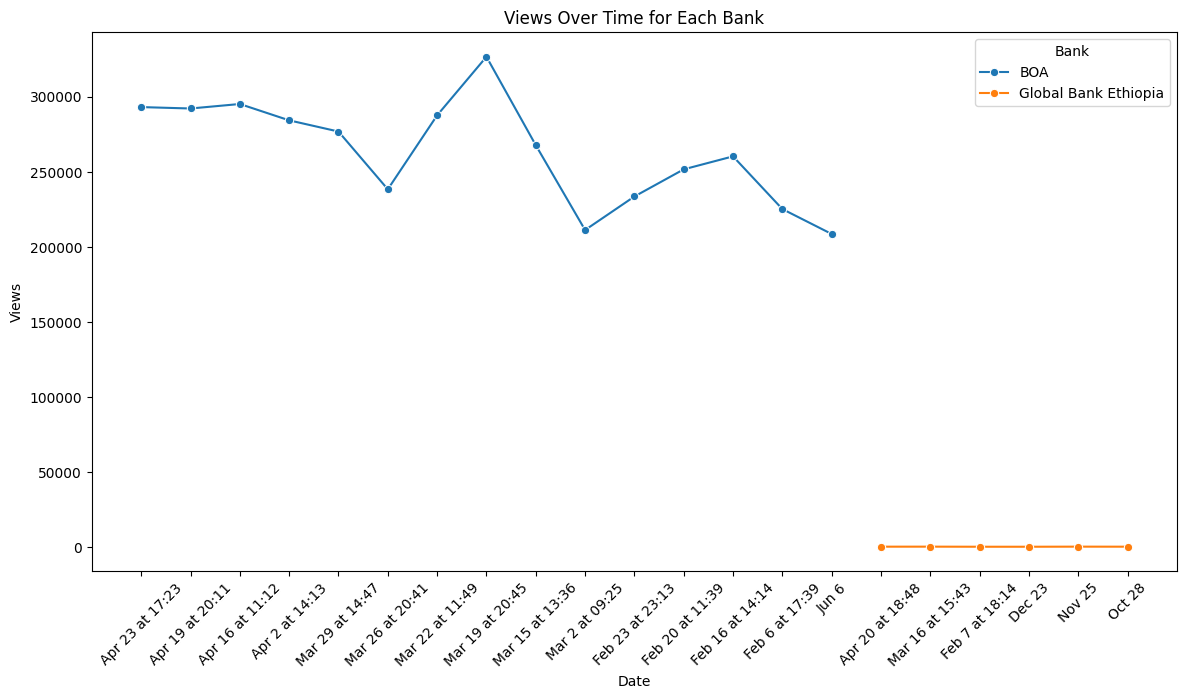

In [57]:
# Trend Over Time: Views over time for each bank
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='View', hue='Bank', data=telegram_messages, marker='o')
plt.title('Views Over Time for Each Bank')
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()


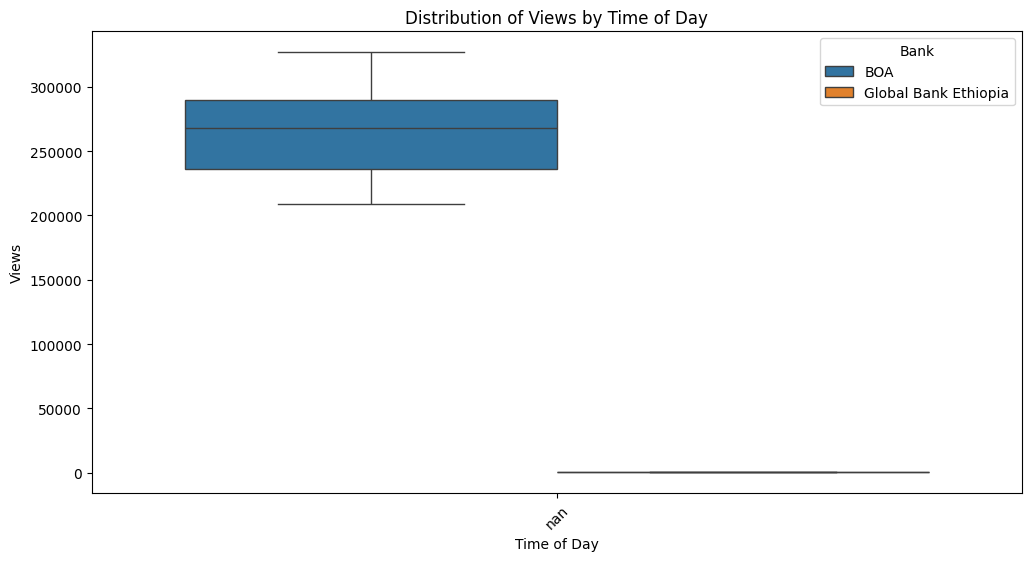

In [84]:
# Views by Time of Day: Distribution of views based on the time of day
plt.figure(figsize=(12, 6))
sns.boxplot(x='Time of day', y='View', hue='Bank', data=telegram_messages)
plt.title('Distribution of Views by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()


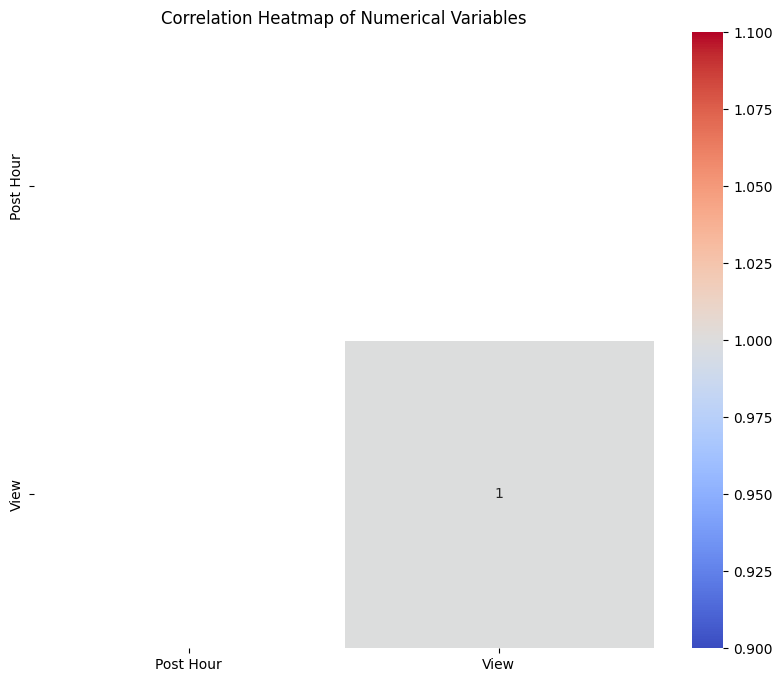

In [59]:
# Correlation Heatmap: Correlation between numerical variables
numerical_columns = telegram_messages[['Post Hour', 'View']]
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


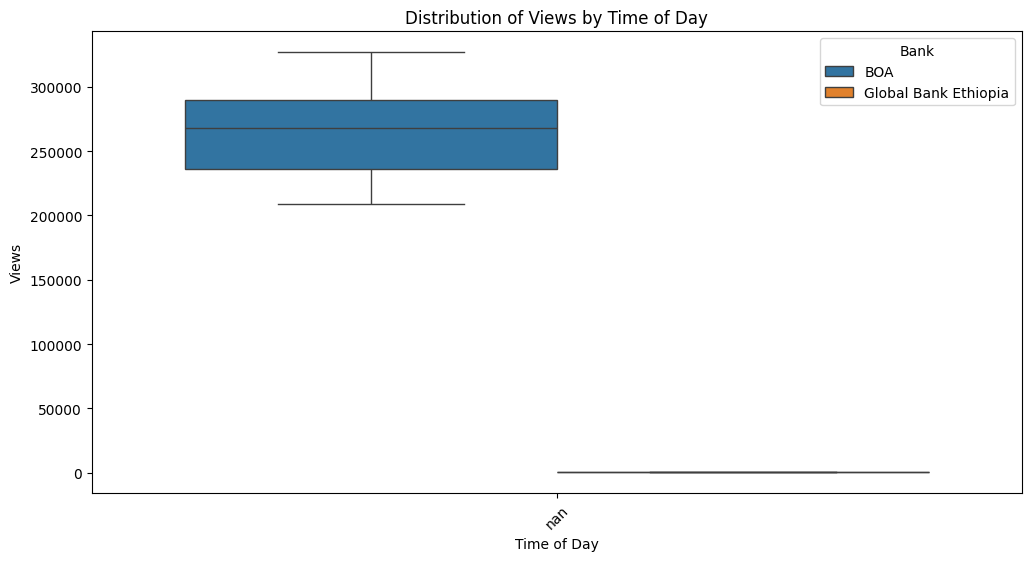

In [63]:
# Ensure 'Time of day' is treated as a categorical variable if necessary
telegram_messages['Time of day'] = telegram_messages['Time of day'].astype(str)

# Views by Time of Day: Distribution of views based on the time of day
plt.figure(figsize=(12, 6))
sns.boxplot(x='Time of day', y='View', hue='Bank', data=telegram_messages)
plt.title('Distribution of Views by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()


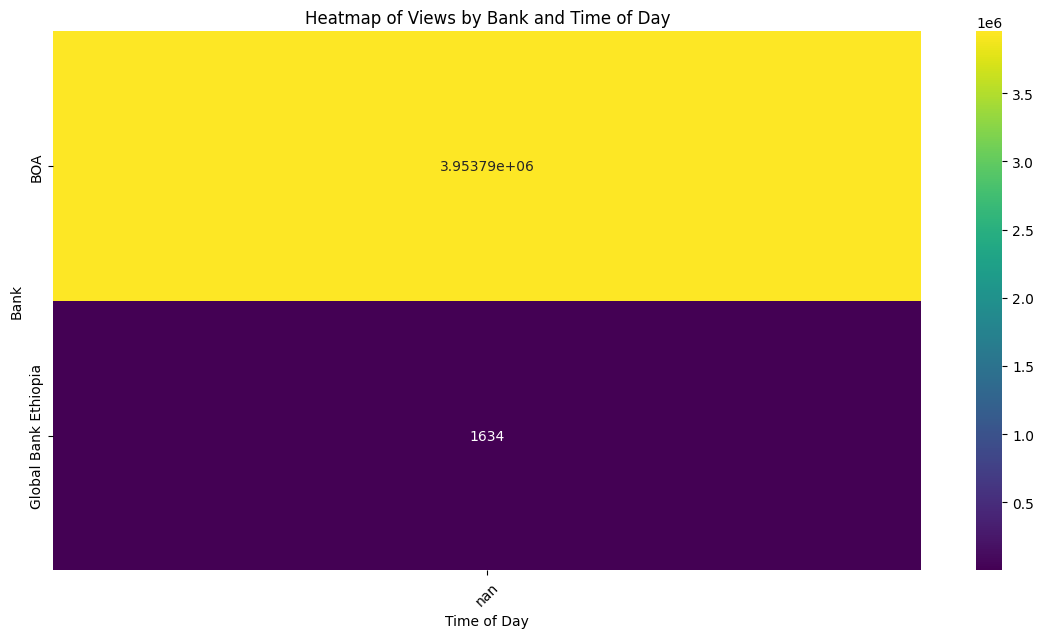

In [73]:
#Heatmap of Views by Bank and Time of Day
views_pivot = telegram_messages.pivot_table(values='View', index='Bank', columns='Time of day', aggfunc='sum')

plt.figure(figsize=(14, 7))
sns.heatmap(views_pivot, annot=True, fmt='g', cmap='viridis')
plt.title('Heatmap of Views by Bank and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Bank')
plt.xticks(rotation=45)
plt.show()


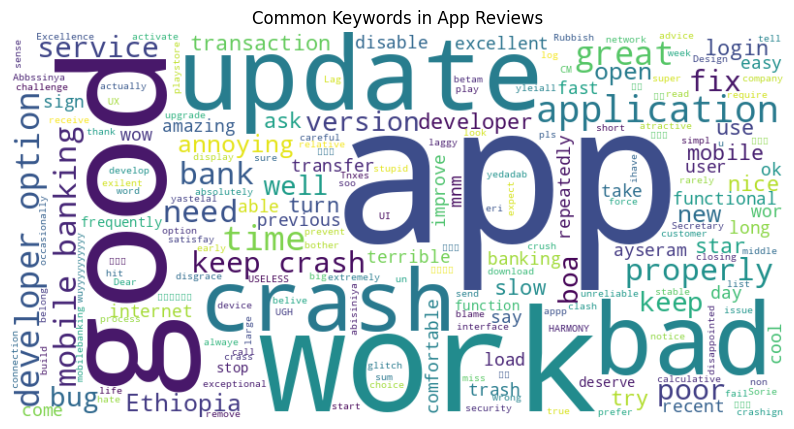

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure that all values in 'Keywords' are strings and handle NaN values
play_store_reviews['Keywords'] = play_store_reviews['Keywords'].fillna('').astype(str)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(play_store_reviews['Keywords']))

# Plot word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in App Reviews')
plt.show()


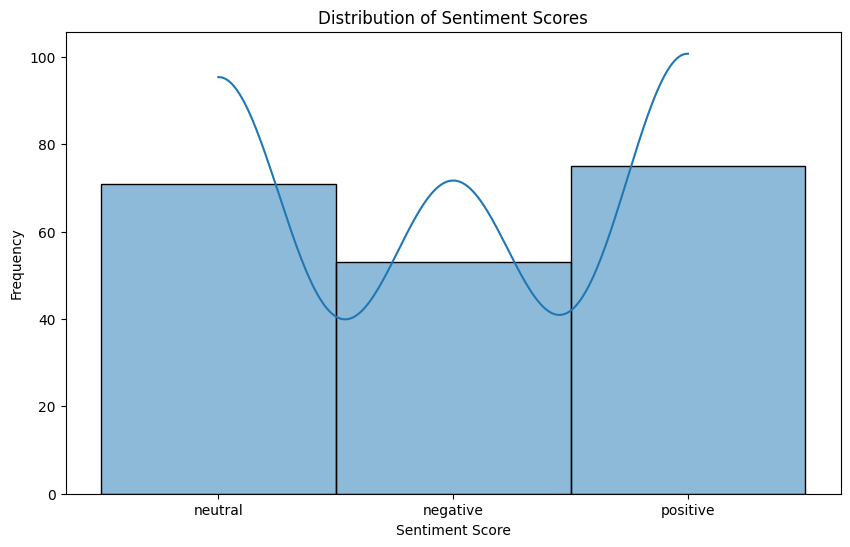

In [75]:
# Assuming 'Sentiment' column exists and contains sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(play_store_reviews['Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


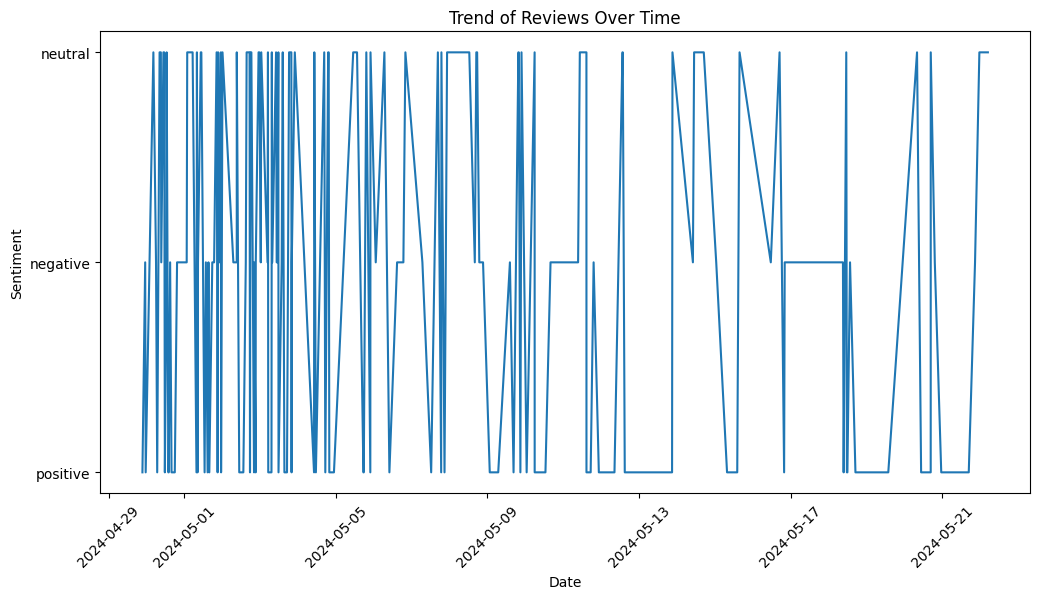

In [77]:
#Trend of Reviews Over Time
play_store_reviews['at'] = pd.to_datetime(play_store_reviews['at'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='at', y='Sentiment', data=play_store_reviews)
plt.title('Trend of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.show()


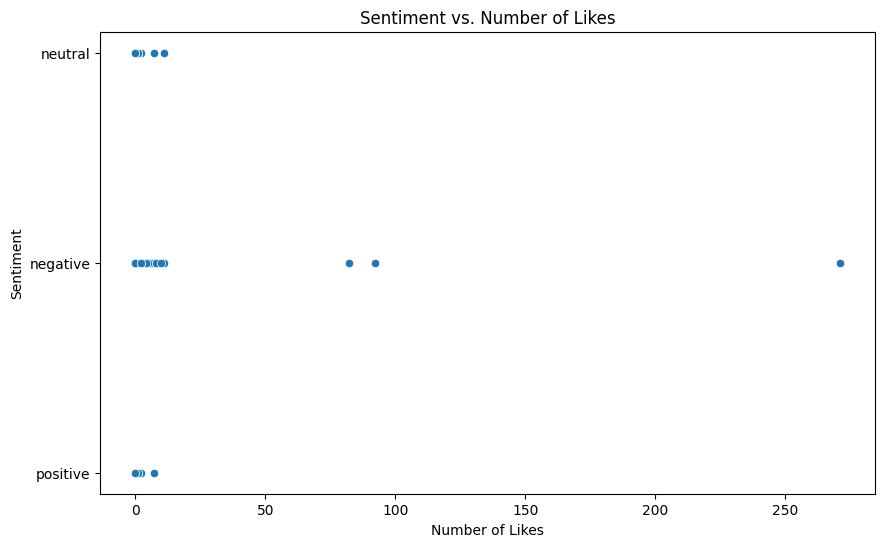

In [81]:
#Scatter Plot of Sentiment vs. Number of Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='👍', y='Sentiment', data=play_store_reviews)
plt.title('Sentiment vs. Number of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Sentiment')
plt.show()


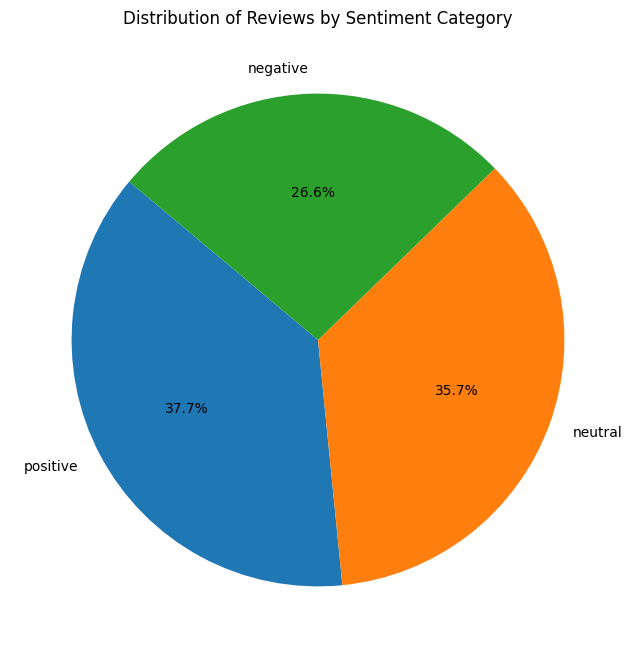

In [82]:
#Pie Chart of Reviews by Sentiment Category
sentiment_counts = play_store_reviews['Sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Reviews by Sentiment Category')
plt.show()


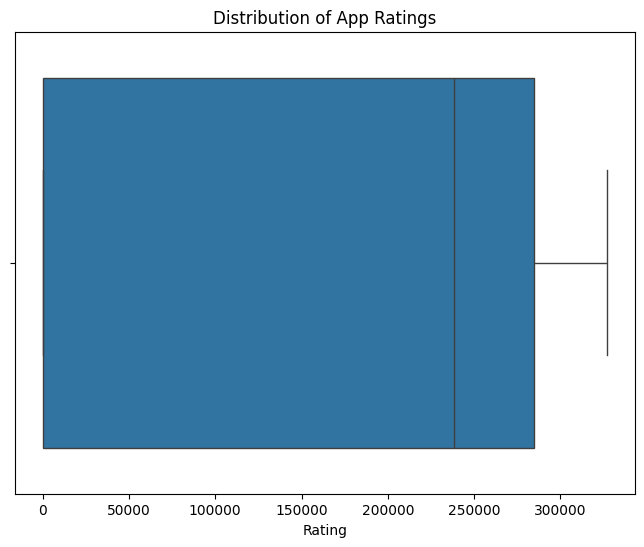

In [90]:
# Box plot of app ratings to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='View', data=telegram_messages)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.show()
